# SVM - Credit Card Fraud Detection

---

## Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import loguniform
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

---

## Datasets preparation

In [2]:
path = '../DataSet/'

datasets = {
    "original": {
        "X_train": path + 'original-dataset/train/X.csv', "y_train": path + 'original-dataset/train/y.csv',
        "X_test": path + 'original-dataset/test/X.csv', "y_test": path + 'original-dataset/test/y.csv'
    },
    "undersampled": {
        "X_train": path + 'undersampled-dataset/train/X.csv', "y_train": path + 'undersampled-dataset/train/y.csv',
        "X_test": path + 'undersampled-dataset/test/X.csv', "y_test": path + 'undersampled-dataset/test/y.csv'
    },
    "oversampled": {
        "X_train": path + 'oversampled-dataset/train/X.csv', "y_train": path + 'oversampled-dataset/train/y.csv',
        "X_test": path + 'oversampled-dataset/test/X.csv', "y_test": path + 'oversampled-dataset/test/y.csv'
    }
}

---

## Original dataset

In [3]:
# Training set
X_train = pd.read_csv(datasets["original"]["X_train"])
y_train = pd.read_csv(datasets["original"]["y_train"])

# Test set
X_test = pd.read_csv(datasets["original"]["X_test"])
y_test = pd.read_csv(datasets["original"]["y_test"])

### Scaling

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [5]:
X_train

array([[-0.33974783, -1.95144063, -1.16681856, ..., -1.6211327 ,
         0.96676   , -0.4486209 ],
       [ 4.27773998,  1.24181171, -0.15922175, ...,  1.34827683,
        -0.71311931,  0.33519183],
       [-0.0533992 ,  0.05339701, -0.92214029, ...,  1.73038298,
        -0.15212107,  0.26753092],
       ...,
       [-0.32837128, -0.31497174, -0.07400401, ..., -0.8272693 ,
        -0.29672056, -0.59571272],
       [-0.33974783, -0.14359433, -1.50291696, ...,  0.88219506,
         1.2243654 ,  1.01984233],
       [ 0.09364469, -0.38688453,  0.62962541, ..., -0.81609192,
         0.0044092 ,  0.11724428]], shape=(199364, 30))

### Hyperparam tuning with GridSearchCV

In [6]:
if os.path.exists('grid_search_svm_original.pkl'):
    print("Loading existing grid search results...")
    grid = joblib.load('grid_search_svm_original.pkl')

else:
    print("Performing grid search for SVM on original dataset...")
    param_grid = {
        'C': loguniform(1e-2, 1e2),
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    svm = SVC(probability=True, random_state=42)
    grid = RandomizedSearchCV(estimator=svm, param_distributions=param_grid,
                          n_iter=10, scoring='roc_auc', cv=cv,
                          n_jobs=-1, verbose=2, random_state=42)
    grid.fit(X_train, y_train)

    joblib.dump(grid, 'grid_search_svm_original.pkl')

best_params = grid.best_params_
best_score = grid.best_score_
best_estimator = grid.best_estimator_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")
print(f"Best estimator: {best_estimator}")

Loading existing grid search results...
Best parameters: {'C': np.float64(21.368329072358772), 'gamma': 'auto', 'kernel': 'rbf'}
Best score: 0.9490814806058475
Best estimator: SVC(C=np.float64(21.368329072358772), gamma='auto', probability=True,
    random_state=42)


### Evaluation on test set

c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS-Credit-card-fraud-detection\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS-Credit-card-fraud-detection\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.32      0.47       136

    accuracy                           1.00     85443
   macro avg       0.93      0.66      0.74     85443
weighted avg       1.00      1.00      1.00     85443

Test ROC AUC Score: 0.96060120919668
Test Confusion Matrix:
[[85300     7]
 [   92    44]]


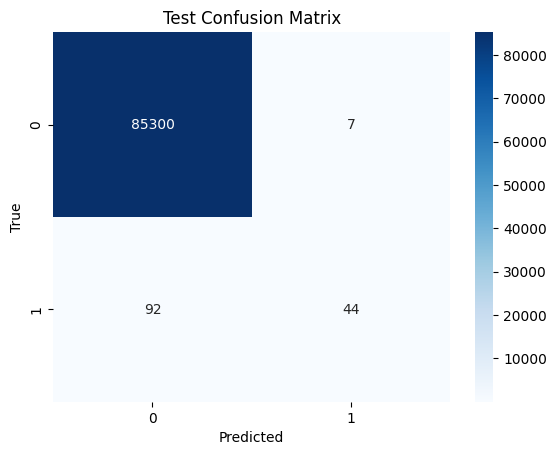

In [7]:
y_test_pred = best_estimator.predict(X_test)
y_test_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

## Undersampled dataset

In [8]:
# Training set
X_train = pd.read_csv(datasets["undersampled"]["X_train"])
y_train = pd.read_csv(datasets["undersampled"]["y_train"])

# Test set
X_test = pd.read_csv(datasets["undersampled"]["X_test"])
y_test = pd.read_csv(datasets["undersampled"]["y_test"])

# Original test set
X_test_ori = pd.read_csv(datasets["original"]["X_test"])
y_test_ori = pd.read_csv(datasets["original"]["y_test"])

### Hyperparam tuning with GridSearchCV

In [9]:
if os.path.exists('grid_search_svm_undersampled.pkl'):
    print("Loading existing grid search results...")
    grid = joblib.load('grid_search_svm_undersampled.pkl')

else:
    print("Performing grid search for undersampled dataset...")
    param_grid = {
        'C': loguniform(1e-2, 1e2),
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    svm = SVC(probability=True, random_state=42)
    grid = RandomizedSearchCV(estimator=svm, param_distributions=param_grid,
                          n_iter=10, scoring='roc_auc', cv=cv,
                          n_jobs=-1, verbose=2, random_state=42)
    grid.fit(X_train, y_train)

    joblib.dump(grid, 'grid_search_svm_undersampled.pkl')

best_params = grid.best_params_
best_score = grid.best_score_
best_estimator = grid.best_estimator_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")
print(f"Best estimator: {best_estimator}")

Loading existing grid search results...
Best parameters: {'C': np.float64(0.017073967431528128), 'gamma': 'auto', 'kernel': 'linear'}
Best score: 0.9817573669305698
Best estimator: SVC(C=np.float64(0.017073967431528128), gamma='auto', kernel='linear',
    probability=True, random_state=42)


### Evaluation on undersampled test set

Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       150
           1       0.99      0.90      0.94       146

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

Test ROC AUC Score: 0.9787671232876711
Test Confusion Matrix:
[[148   2]
 [ 14 132]]


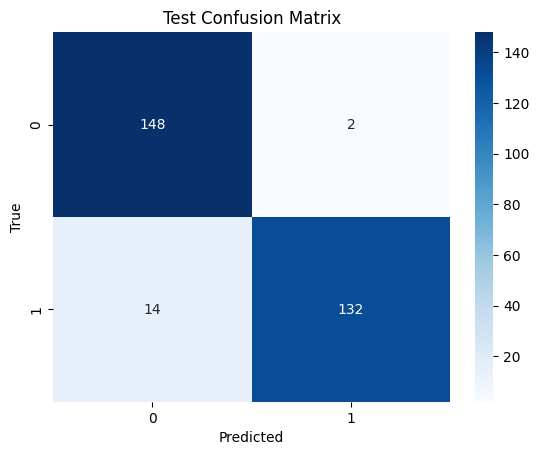

In [10]:
y_test_pred = best_estimator.predict(X_test)
y_test_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Evaluation on original test set

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

Test ROC AUC Score: 0.9915316238443986
Test Confusion Matrix:
[[83026  2281]
 [   10   126]]


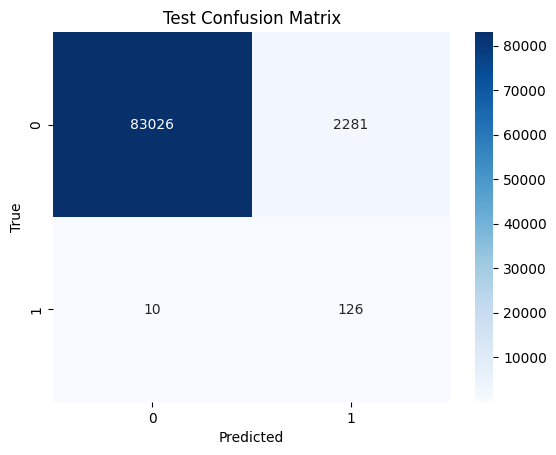

In [11]:
y_test_pred = best_estimator.predict(X_test_ori)
y_test_pred_proba = best_estimator.predict_proba(X_test_ori)[:, 1]

print("Test Classification Report:")
print(classification_report(y_test_ori, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test_ori, y_test_pred_proba))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test_ori, y_test_pred))
sns.heatmap(confusion_matrix(y_test_ori, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

## Oversampled dataset

In [12]:
# Training set
X_train = pd.read_csv(datasets["oversampled"]["X_train"])
y_train = pd.read_csv(datasets["oversampled"]["y_train"])

# Test set
X_test = pd.read_csv(datasets["oversampled"]["X_test"])
y_test = pd.read_csv(datasets["oversampled"]["y_test"])

### Scaling

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [14]:
X_train

array([[-0.40252193, -1.78801326, -0.03953088, ..., -1.82911531,
         0.31612824, -0.46003976],
       [ 4.65847268,  1.43853484,  0.34440412, ...,  1.36234378,
        -0.40930151,  0.14909356],
       [-0.08866969,  0.23772864,  0.0537014 , ...,  1.77302346,
        -0.16704315,  0.09651146],
       ...,
       [-0.40044289, -1.06346102,  0.61912474, ..., -0.38503739,
        -0.0773115 , -0.0843506 ],
       [ 0.0650186 ,  1.04677553,  0.76605044, ..., -0.36974985,
        -0.12129076, -0.09511358],
       [-0.40252193, -1.4217068 , -2.36863582, ...,  1.41343418,
         2.39361909, -3.09314089]], shape=(398016, 30))

### SVM training

> **_NOTE:_**  Since GridSearch and SVM training on the oversampled dataset are very heavy and therefore very long, we decided to use the hyperparameters found on the original dataset for training on the oversampled dataset.

In [ ]:
model_path = 'svm_model_oversampled.pkl'

if os.path.exists(model_path):
    print("Loading existing trained SVM model...")
    clf = joblib.load(model_path)
else:
    print("Training SVM model with fixed hyperparameters on oversampled dataset...")

    clf = SVC(
        C=21.368329072358772,
        gamma='auto',
        kernel='rbf',
        probability=True,
        random_state=42
    )

    clf.fit(X_train, y_train)

    joblib.dump(clf, model_path)

print("Model ready to use.")

Loading existing trained SVM model...
Model ready to use.


### Evaluation on test set

c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS-Credit-card-fraud-detection\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\hugop\IA\ESIEE-IT\M1\PIVS\PIVS-Credit-card-fraud-detection\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     85307
           1       0.00      0.02      0.00       136

    accuracy                           0.93     85443
   macro avg       0.50      0.48      0.48     85443
weighted avg       1.00      0.93      0.96     85443

Test ROC AUC Score: 0.46833952320304734
Test Confusion Matrix:
[[79617  5690]
 [  133     3]]


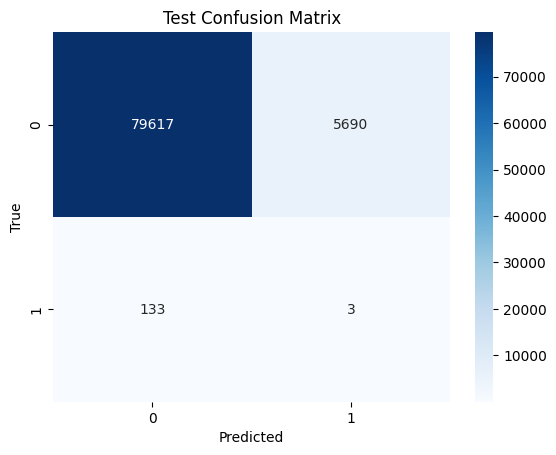

In [16]:
# Prédictions
y_test_pred = clf.predict(X_test)
y_test_pred_proba = clf.predict_proba(X_test)[:, 1]

# Évaluation
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred_proba))

print("Test Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

# Heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

## SVM - Results comparison

| Dataset         | Best Parameters                                              | F1-Score (Class 1) | Recall (Class 1) | Precision (Class 1) | ROC AUC | Confusion Matrix                 | Observations                                                                                   |
|-----------------|--------------------------------------------------------------|---------------------|------------------|----------------------|---------|----------------------------------|------------------------------------------------------------------------------------------------|
| **Original**     | `c=21.37`, `gamma='auto'`, `kernel='rbf'` | 0.47                | 0.32             | 0.86                 | 0.961   | TN=85300, FP=7, FN=92, TP=44   | High precision but very low recall, indicating the model misses many fraud cases.   |
| **Undersampled** | `c=0.02`, `gamma='auto'`, `kernel='linear'` | 0.10                | 0.93             | 0.05                 | 0.991   | TN=83026, FP=2281, FN=10, TP=126       | Excellent recall but extremely poor precision, leading to a high number of false positives.                |
| **Oversampled**  | `c=21.37`, `gamma='auto'`, `kernel='rbf'` | 0.00                | 0.02             | 0.00                 | 0.468   | TN=79617, FP=5690, FN=133, TP=3  | Model fails almost completely, with near-zero recall and precision.         |


**Global observation:**

SVM struggles significantly with class imbalance. It either overpredicts the minority class with poor precision or underdetects it with low recall. Performance is especially unstable on oversampled data, making it unreliable for fraud detection in this setup.